## Notebook settings

In [1]:
%load_ext autoreload
%autoreload 2

%autosave 10

#%load_ext lab_black

Autosaving every 10 seconds


In [2]:
import sys
import os

sys.path.insert(0, os.path.abspath(os.path.join("..")))

## Imports

In [3]:
from lfp_analysis.data import *
from lfp_analysis.process import *

In [4]:
import numpy as np
import pandas as pd
import h5py

from pathlib import Path

import matplotlib.pyplot as plt

%matplotlib widget

## Visualization utils:

In [5]:
def image_hist(X):
    v_min, v_max = X.min(), X.max()
    bins = np.linspace(v_min, v_max, 400)
    hist_data = np.apply_along_axis(lambda a: np.histogram(a, bins=bins)[0], 1, X)

    plt.figure()
    plt.imshow(hist_data, aspect="auto", extent=(v_min, v_max, 2, 101))
    plt.colorbar()
    plt.show()

In [6]:
from PIL import Image
import PIL


def view_sample(X, idx=176, win_size=256, contiguous=7):

    cm = plt.get_cmap("viridis")
    img = Image.fromarray(
        np.uint8(cm(X[:, idx * win_size : (idx + 1 * contiguous) * win_size]) * 255)
    )

    # print(np.any(bipolar.label[idx * win_size : (idx + 1 * contiguous) * win_size]))
    return img.transpose(PIL.Image.FLIP_TOP_BOTTOM).resize((256 * contiguous, 256))

# Import data:

In [7]:
PAT_ID = Path('ET2')
DATASET_NAME = Path('Pouring_off')

DATA_PATH = Path("./../data")
H5_FILE = DATA_PATH / 'preprocessed' / PAT_ID / DATASET_NAME.with_suffix('.h5')

In [8]:
h5 = h5py.File(H5_FILE, "r")
bipolar = h5["LFP"][:]
h5.close()

In [9]:
bipolar.shape

(5, 627750)

In [10]:
TF = TfTransformer(bipolar).TF().power

# Processing options:

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

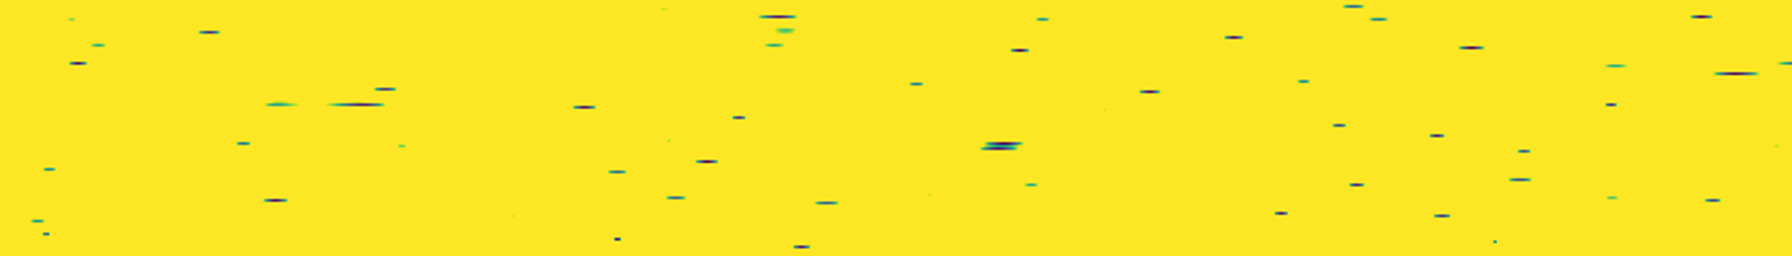

In [11]:
# Raw power:
t_X = TF[0]

image_hist(t_X)
view_sample(t_X)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

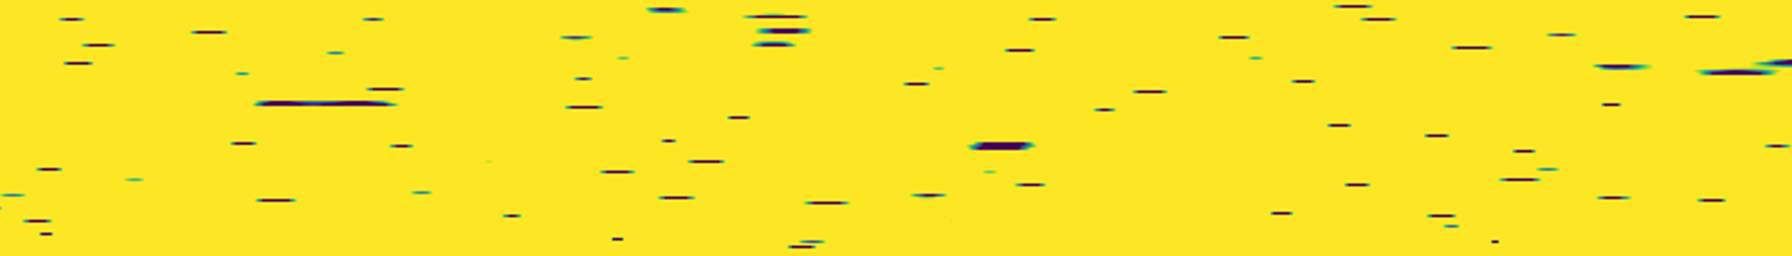

In [12]:
t_X = np.log(TF[0])

image_hist(t_X)
view_sample(t_X)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

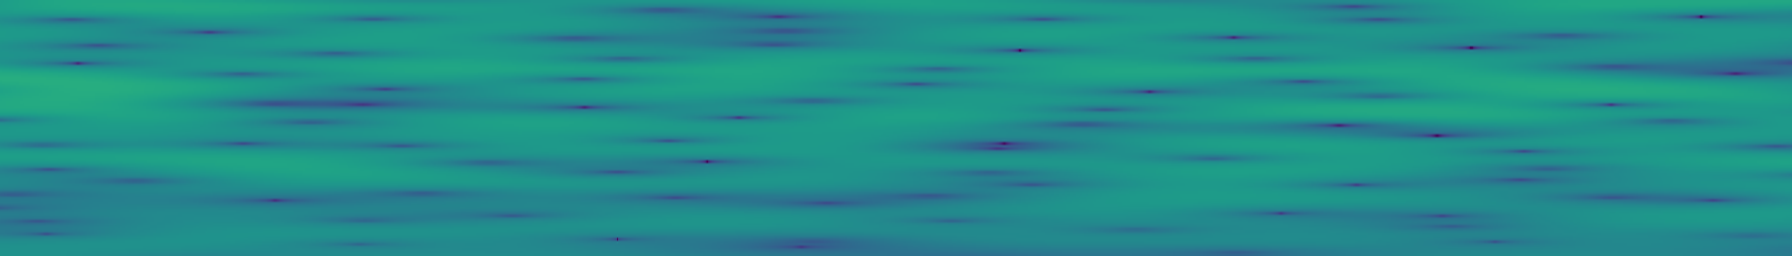

In [13]:
t_X = clip(zscore(np.log(TF[0])))

image_hist(t_X)
view_sample(t_X)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

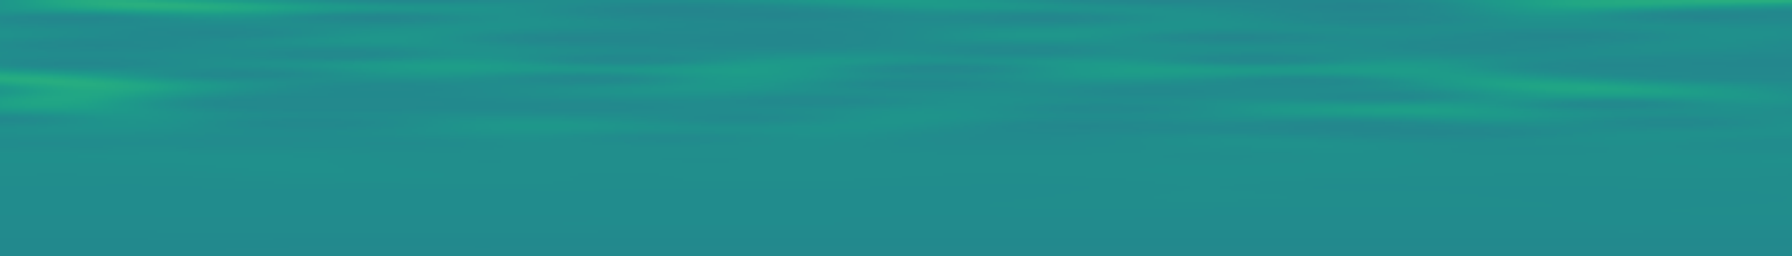

In [14]:
t_X = clip(zscore((TF[0])))

image_hist(t_X)
view_sample(t_X)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

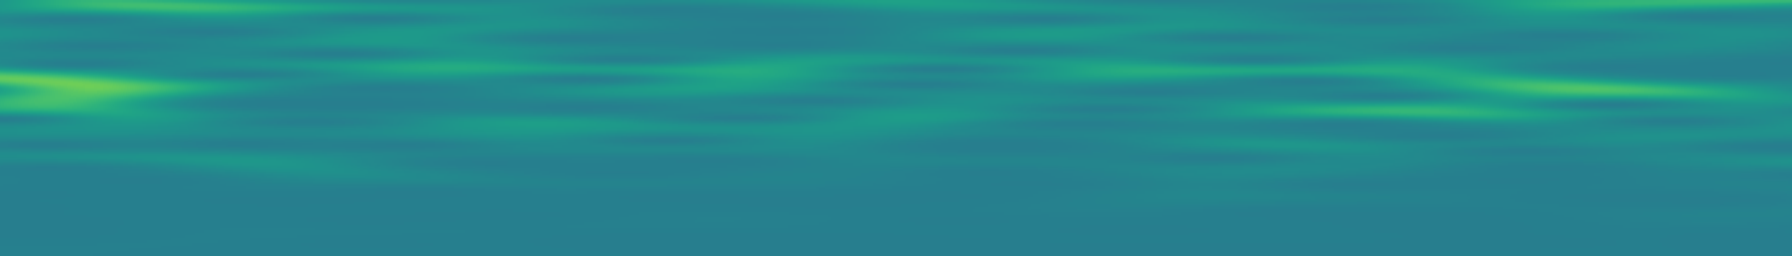

In [15]:
t_X = clip(bl_correct(TF[0]))

image_hist(t_X)
view_sample(t_X)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

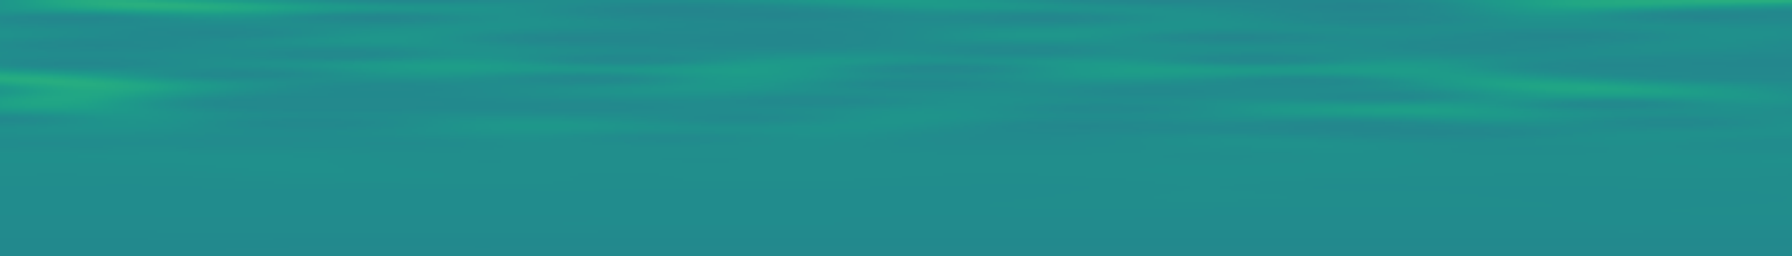

In [16]:
t_X = clip(zscore(bl_correct(TF[0])))

image_hist(t_X)
view_sample(t_X)

# Process TF:

In [17]:
def process(X, **kwargs):
    # X = AxisApplier(np.log)(X)
    X = AxisApplier(zscore)(X)
    X = AxisApplier(clip)(X, **kwargs)

    return X

In [18]:
TF = process(TF, std_factor=5)

In [19]:
# Quantize:
TF = np.uint8(TF * 255)

# Save to file:

In [20]:
def save_to_h5(path, TF):
    f = h5py.File(path, "w")
    f.create_dataset("TF", data=TF)
    f.close()

In [21]:
H5_TARGET = DATA_PATH/'TF_and_df'/ PAT_ID / DATASET_NAME.with_suffix('.h5')

In [22]:
save_to_h5(H5_TARGET, TF)